In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = True
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/programs/avid

/home/nicholas/programs/avid


In [3]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.training_state import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
# run_dir = Path('logs') / 'e_form_equivariant_patch_235'
# run_dir = Path('logs') / '04-13-interrupted-919'
# run_dir = Path('logs') / '04-13-14_650'
run_dir = Path('logs') / '04-15-22_360'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_diled()

ckpt = best_ckpt(run_dir)
# ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.bfloat16), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nicholas/programs/avid/logs/04-15-22_360/final_ckpt/ckpts

Restoring item from /home/nicholas/programs/avid/logs/04-15-22_360/final_ckpt/ckpts/10399.

Finished restoring checkpoint from /home/nicholas/programs/avid/logs/04-15-22_360/final_ckpt/ckpts/10399.

In [4]:
from avid.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_structure(params);
debug_stat(params);

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── float32[6]
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[64]
│   │   │   └── kernel
│   │   │       └── float32[128, 64]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[3072]
│   │   │   └── kernel
│   │   │       └── float32[64, 3072]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[64]
│   │       └── scale
│   │           └── float32[64]
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── float32[512]
│   │   │   └── scale
│   │   │       └── float32[512]
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 16]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[512]
│   │   │   │   └── scale
│   │   │   │       └── float32[512]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[512]
│   │   │   │   └── scale
│   │   │   │       └── float32[512]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[512]
│   │   │       └── kernel
│   │   │           └── float32[512, 512]
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 16]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[512]
│   │   │   │   └── scale
│   │   │   │       └── float32[512]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[512]
│   │   │   │   └── scale
│   │   │   │       └── float32[512]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[512]
│   │   │       └── kernel
│   │   │           └── float32[512, 512]
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── bfloat16[35, 16]
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[512]
│   │   │   │   └── scale
│   │   │   │       └── float32[512]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[512]
│   │   │   │   └── scale
│   │   │   │       └── float32[512]
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── float32[512]
│   │   │       └── kernel
│   │   │           └── float32[512, 512]
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── bfloat16[35, 16]
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │       

arg0
├── diffusion >>> backbone
│   ├── aby_scale
│   │   └── 0.5293
│   ├── condition_mlp
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.0246
│   │   │   └── kernel
│   │   │       └── 0.0038
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── 0.0002
│   │   │   └── kernel
│   │   │       └── -0.0002
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.0471
│   │       └── scale
│   │           └── 0.8158
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── -0.0239
│   │   │   └── scale
│   │   │       └── 1.0109
│   │   ├── encoderblock_0
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── 0.0075
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0004
│   │   │   │   └── scale
│   │   │   │       └── 0.0001
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0002
│   │   │   │   └── scale
│   │   │   │       └── -0.0027
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0007
│   │   │       └── kernel
│   │   │           └── -0.0001
│   │   ├── encoderblock_1
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── 0.0101
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0015
│   │   │   │   └── scale
│   │   │   │       └── 0.0052
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0011
│   │   │   │   └── scale
│   │   │   │       └── 0.0003
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0015
│   │   │       └── kernel
│   │   │           └── -0.0000
│   │   ├── encoderblock_2
│   │   │   ├── EquivariantMHA_0
│   │   │   │   ├── key
│   │   │   │   │   └── {...}
│   │   │   │   ├── key_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── out
│   │   │   │   │   └── {...}
│   │   │   │   ├── query
│   │   │   │   │   └── {...}
│   │   │   │   ├── query_ln
│   │   │   │   │   └── {...}
│   │   │   │   ├── relative_attn
│   │   │   │   │   └── 0.0131
│   │   │   │   └── value
│   │   │   │       └── {...}
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0004
│   │   │   │   └── scale
│   │   │   │       └── 0.0128
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── -0.0011
│   │   │   │   └── scale
│   │   │   │       └── -0.0013
│   │   │   └── LazyInMLP_0 >>> Dense_0
│   │   │       ├── bias
│   │   │       │   └── 0.0012
│   │   │       └── kernel
│   │   │           └── 0.0001
│   │   └── encoderblock_3
│   │       ├── EquivariantMHA_0
│   │       │   ├── key
│   │       │   │   └── {...}
│   │       │   ├── key_ln
│   │       │   │   └── {...}
│   │       │   ├── out
│   │       │   │   └── {...}
│   │       │   ├── query
│   │       │   │   └── {...}
│   │       │   ├── query_ln
│   │       │   │   └── {...}
│   │       │   ├── relative_attn
│   │       │   │   └── 0.0224
│   │       │   └── value
│   │       │       └── {...}
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── -0.0001
│   │       │   └── scale
│   │       │       └── 0.0063
│   │       ├── LayerNorm_1
│   │       │   ├── bias
│   │       │   │   └── 0.0027
│   │       │   └── sca

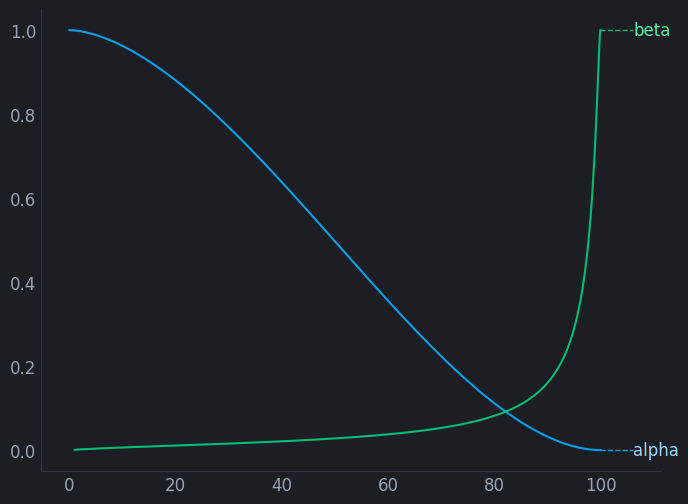

In [5]:
xx = jnp.linspace(0, 100, 1000)

for k, v in model.diffusion.schedule.alpha_beta(xx).items():
    plt.plot(xx, v, label=k)

rp.line_labels()

In [6]:
model.encoder_decoder.spec_emb.species_embed_matrix()


Array([[ 0.57748234, -0.07436581, -0.08953023, ...,  0.05160689,
        -0.14352939,  0.01843821],
       [-0.01597208,  0.44351584,  0.05742051, ...,  0.03769099,
        -0.02846838, -0.16965827],
       [-0.07904676, -0.10382061,  0.38721135, ..., -0.13809973,
        -0.01101303, -0.02402532],
       ...,
       [ 0.05742405, -0.0911646 ,  0.16511491, ...,  0.08906329,
         0.11075186, -0.04577876],
       [-0.0733418 ,  0.08181787,  0.09896007, ...,  0.14691603,
         0.02333637, -0.02758829],
       [-0.0442863 ,  0.0463412 ,  0.06721567, ...,  0.00624499,
        -0.19101913, -0.02762834]], dtype=float32)

,Li,Be,B,N,O,F,Na,Mg,Al,Si,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,0.577482,-0.015972,-0.079047,0.131433,0.048053,0.035957,-0.054192,-0.111140,-0.074483,-0.035302,...,0.075440,0.019595,-0.155882,0.112078,0.019032,-0.014025,0.074787,0.057424,-0.073342,-0.044286
1,-0.074366,0.443516,-0.103821,-0.037556,-0.070999,-0.052986,-0.033925,0.018715,0.027469,-0.107709,...,-0.112138,-0.055750,-0.060072,0.007978,0.016705,0.099734,-0.014264,-0.091165,0.081818,0.046341
2,-0.089530,0.057421,0.387211,0.004453,-0.085977,-0.034046,-0.108637,-0.004680,0.019646,0.000729,...,-0.017325,0.067620,0.016602,0.015117,0.037092,0.039723,0.087531,0.165115,0.098960,0.067216
3,0.019064,0.002225,0.033096,0.486988,-0.055013,0.005845,-0.054853,-0.109798,0.018825,-0.070492,...,0.124837,-0.087542,0.047235,-0.043812,0.133535,-0.033689,0.037273,-0.158898,-0.021985,0.063786
4,-0.072474,-0.071630,-0.096886,-0.081539,0.476721,-0.148241,0.114806,-0.075296,-0.020561,-0.082321,...,-0.002847,0.019527,-0.019364,0.010027,0.055077,-0.005270,-0.114990,-0.009716,0.082585,0.036592


<Axes: >

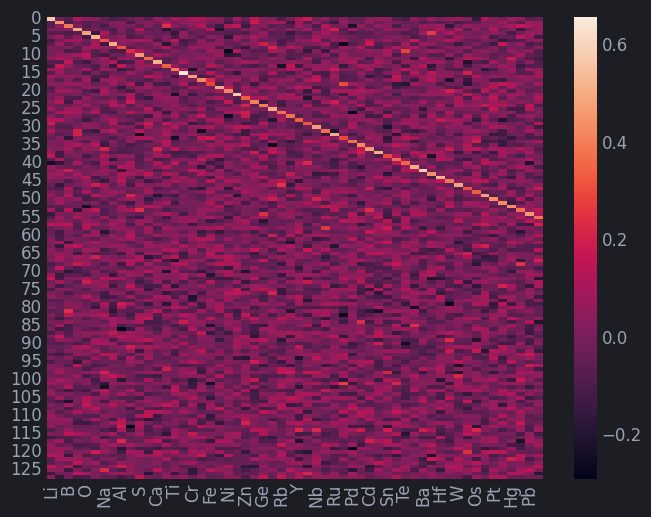

In [7]:
from avid.utils import ELEM_VALS
spec_emb = model.encoder_decoder.spec_emb.species_embed_matrix()

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS).T.reset_index(drop=True)
display(spec_df.head())

sns.heatmap(spec_df)

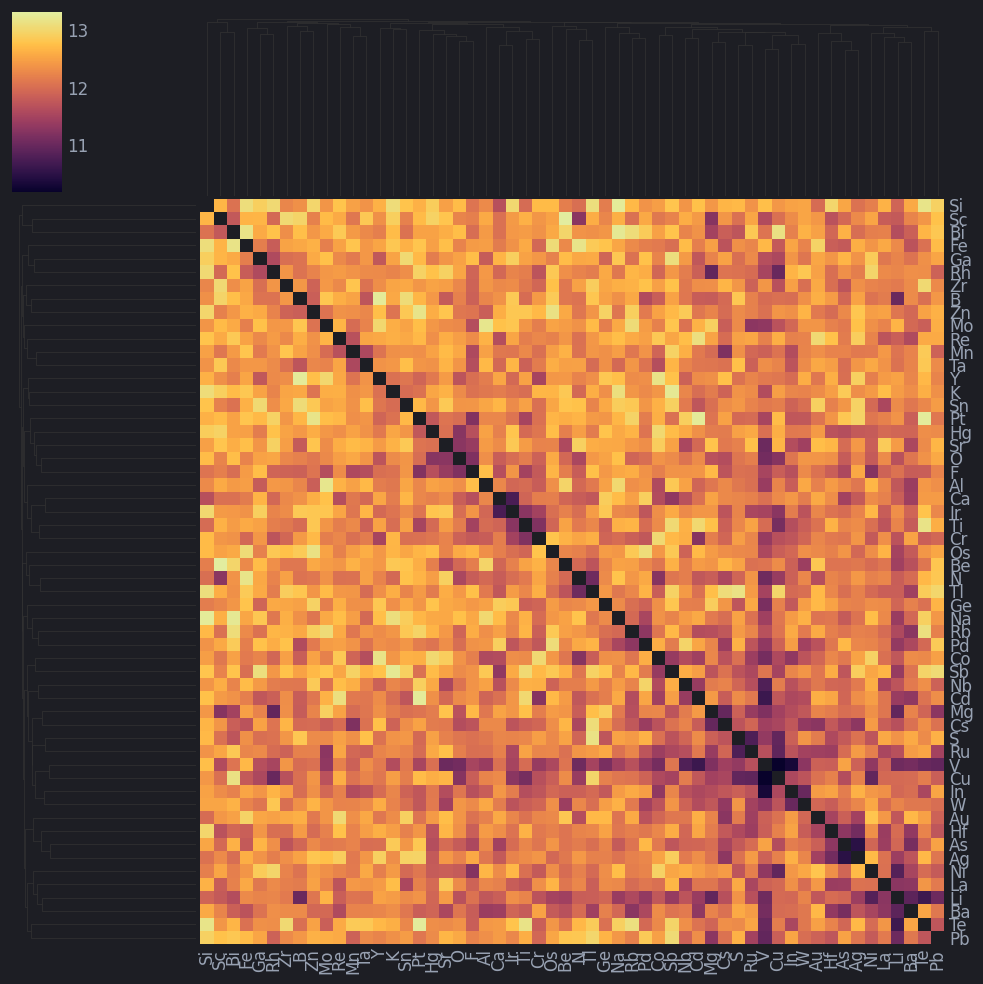

In [8]:
from scipy.spatial.distance import braycurtis, cityblock
corr = spec_df.corr(method=cityblock)
sns.clustermap(corr, xticklabels=1, yticklabels=1, cmap='rho_heatmap', mask=np.eye(len(corr.index)))

In [9]:
from umap import UMAP
from sklearn.decomposition import PCA
import plotly.express as px

# umap = UMAP(n_neighbors=10, metric='manhattan')
umap = PCA(n_components=2)
umap_df = spec_df.copy().T

umap_df[['x', 'y']] = umap.fit_transform(spec_df.T.values)

umap_df.columns = [str(c) for c in umap_df.columns]
px.scatter(umap_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

<Axes: >

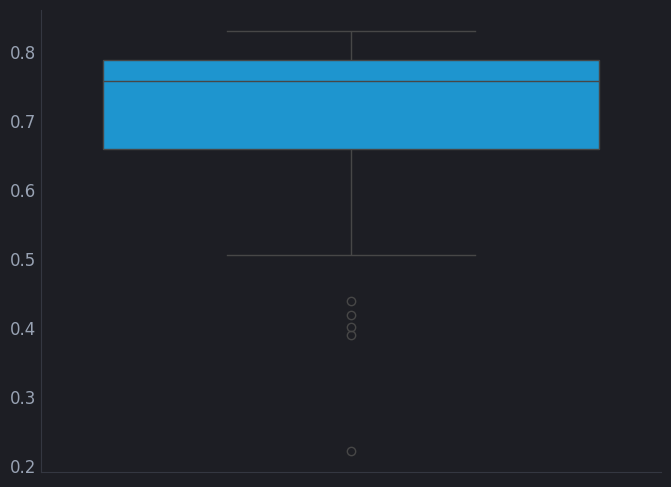

In [10]:
sns.boxplot(params['encoder_decoder']['encoder_conv']['layers_0']['layers_1']['scale'])

In [11]:
# debug_stat(params['mixer']['EquivariantMixerMLP_0']);
mha0 = params['diffusion']['backbone']['encoder']['encoderblock_0']['EquivariantMHA_0']
debug_structure(mha0);

arg0
├── key
│   ├── bias
│   │   └── float32[16, 32]
│   └── kernel
│       └── float32[512, 16, 32]
├── key_ln >>> scale
│   └── float32[32]
├── out
│   ├── bias
│   │   └── float32[512]
│   └── kernel
│       └── float32[16, 32, 512]
├── query
│   ├── bias
│   │   └── float32[16, 32]
│   └── kernel
│       └── float32[512, 16, 32]
├── query_ln >>> scale
│   └── float32[32]
├── relative_attn
│   └── bfloat16[35, 16]
└── value
    ├── bias
    │   └── float32[16, 32]
    └── kernel
        └── float32[512, 16, 32]

<Axes: >

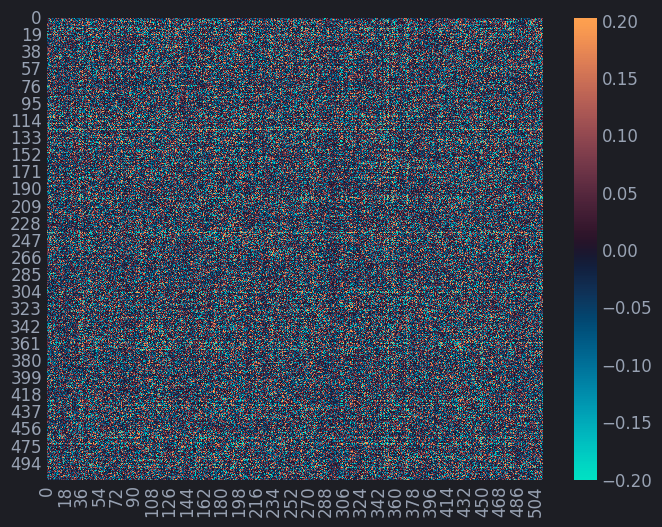

In [12]:
# sns.heatmap(params['head']['Dense_0']['kernel'], center=0, cmap='rho_diverging')
mat = mha0['query']['kernel'].astype(jnp.float32)
sns.heatmap(mat.reshape(mat.shape[0], mat.shape[0]), center=0, cmap='rho_diverging', robust=True)

<Axes: ylabel='Density'>

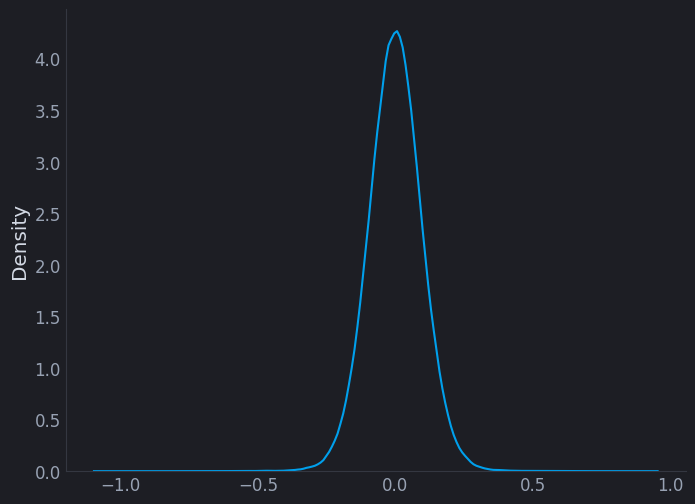

In [13]:
sns.kdeplot(mat.reshape(-1))

In [14]:
import functools as ft
from einops import rearrange, reduce

N_GRID = 24

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = rearrange(jnp.array([xx, yy, zz]), 'd n1 n2 n3 -> (n1 n2 n3) d')


cmap = rp.list_div_coolwarm

def plot(dens, n_skip=2, thresh=0.1, cmap='auto'):
    bg_mask = abs(dens) > thresh
    skip_mask = jnp.all(jnp.round(xyz * N_GRID) % n_skip == 0, axis=1)
    mask = skip_mask & bg_mask
    color_args = {
        'color_continuous_scale': cmap
    }
    if jnp.mean(dens < 0) > 0.1:
        color_args['color_continuous_midpoint'] = 0
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_div_icefire if is_dark else rp.list_div_coolwarm
    else:
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_inferna if is_dark else rp.list_inferna_r
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask],
        # color=np.array(species[mask]).astype('str'),
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
        **color_args
    )

In [15]:
from avid.dataset import load_file

batch = load_file(config, 0)
spec_emb, conv, patch = model.encoder_decoder.encode(batch, training=False)

<Axes: >

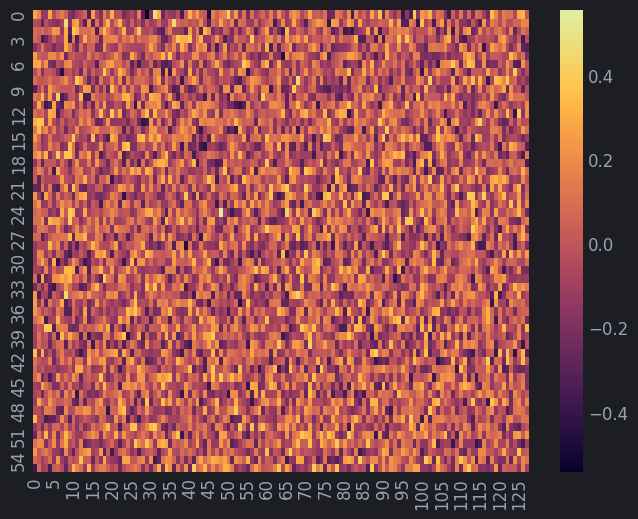

In [16]:
sns.heatmap(params['encoder_decoder']['spec_emb']['embed_raw'], cmap='rho_heatmap')

In [17]:
ed = model.encoder_decoder

ed.spec_emb.species_embed_matrix()[batch.species].T.shape

(128, 5, 52)

In [18]:
from functools import partial
from avid.diffusion import DiffusionInput
import flax.linen as nn
from tqdm import tqdm


rng = jax.random.key(123)
xt = jax.random.normal(rng, shape=patch[[0], ...].shape) * 0.1 + patch[[0], ...]
inp = DiffusionInput(x_t=xt, t=jnp.array([99]), y=model.category(batch)[:1])
state = inp
w = 3
mes = model.diffusion.mu_eps_sigma

steps = [{'state': inp, 'eps': None}]
for i in tqdm(np.arange(inp.t.item() - 1)):
    curr_rng, next_rng = jax.random.split(rng)
    null_state = DiffusionInput(x_t=state.x_t, t=inp.t - 1, y=-jnp.ones_like(state.y))
    mu_eps = mes(state, False)
    mu_eps_null = mes(null_state, False)
    noise = jax.random.normal(curr_rng, shape=mu_eps['mu'].shape)
    eps = ((1 + w) * mu_eps['eps'] - w * mu_eps_null['eps']) * mu_eps['sigma'] * noise
    sched = model.diffusion.schedule.alpha_beta(state.t)
    x_tm1 = 1 / jnp.sqrt(1 - sched['beta']) * (state.x_t - jnp.sqrt(1 - sched['alpha']) * eps)

    next_state = DiffusionInput(x_t=x_tm1, t=state.t - 1, y=state.y)
    state, rng = next_state, next_rng
    steps.append({'state': next_state, 'eps': eps})

100%|██████████| 98/98 [00:23<00:00,  4.15it/s]


In [19]:
jnp.array([step['state'].x_t.mean() for step in steps])


Array([-0.0003894 , -0.00545623, -0.01008358, -0.01470829, -0.01978868,
       -0.02399304, -0.02746532, -0.03120095, -0.03429269, -0.03765992,
       -0.04103868, -0.04359003, -0.046749  , -0.05054963, -0.05362148,
       -0.05712388, -0.06039989, -0.0637968 , -0.06677306, -0.0697956 ,
       -0.07266602, -0.07560898, -0.07834384, -0.08117422, -0.08420782,
       -0.08706851, -0.09009169, -0.0927834 , -0.09545546, -0.09811075,
       -0.10091172, -0.10356335, -0.10631757, -0.10886829, -0.11156971,
       -0.11419566, -0.11670966, -0.11915015, -0.12157531, -0.12392256,
       -0.12631348, -0.12859343, -0.13101834, -0.13326354, -0.13545965,
       -0.13762513, -0.13983467, -0.14201319, -0.14413223, -0.1462835 ,
       -0.14831877, -0.1504221 , -0.15240803, -0.15438262, -0.15635586,
       -0.15829049, -0.16021422, -0.16204113, -0.1638731 , -0.1656825 ,
       -0.16744882, -0.16916794, -0.17087285, -0.17249939, -0.1741037 ,
       -0.17568041, -0.17720544, -0.17872223, -0.18022929, -0.1

In [20]:
sched = model.diffusion.schedule.alpha_beta(steps[0]['state'].t)
alpha = sched['alpha']
beta = sched['beta']

In [21]:
out_spec, out_conv = model.encoder_decoder.patch_decode(state.x_t, training=False)

In [22]:
# orig = batch.density[0]

# spec, conv = model.encoder_decoder.patch_decode(model.encoder_decoder.encode(batch, training=False)[-1], training=False)
# spec = spec[[0], ...]
# spec.shape

In [23]:
[ELEM_VALS[x] for x in batch.species[0][batch.mask[0]]]

['N', 'Rh', 'Te']

In [24]:
spec = out_spec
mat = model.encoder_decoder.spec_emb.species_embed_matrix()
out = spec @ mat.T

out.shape

(1, 24, 24, 24, 56)

In [25]:
elems = np.abs(out.max(axis=(0, 1, 2, 3)))
print(np.sort(elems)[-10:])
elem_is = np.argsort(-elems)
chosen_elems = [x for x in elem_is[elems[elem_is] > 2.5]]
[ELEM_VALS[x] for x in chosen_elems]

[2.1859853 2.2116401 2.246147  2.2522388 2.2639387 2.3222866 2.3819892
 2.5121276 2.5230887 3.1234868]


['O', 'Na', 'Hg']

In [26]:
dens = out[..., jnp.array(chosen_elems)].sum(axis=-1)
dens = dens / jnp.max(jnp.abs(dens))

In [27]:
dens.shape

(1, 24, 24, 24)

In [28]:
import functools as ft
from eins import EinsOp

dens = out[..., jnp.array(chosen_elems)]
dens = dens.sum(axis=-1)
dens = dens / jnp.max(jnp.abs(dens))

N_GRID = config.voxelizer.n_grid

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = EinsOp('d n1 n2 n3 -> (n1 n2 n3) d')(jnp.array([xx, yy, zz]))

xyz = (xyz + 0.2) % 1


def plot(dens, skip=2, thresh=0.1):
    cmap = rp.list_aquaria if is_dark else rp.list_cabana
    skip_mask = jnp.mgrid[0:N_GRID, 0:N_GRID, 0:N_GRID] % skip == 0
    skip_mask = skip_mask.reshape(3, -1).all(axis=0)
    dens = dens.reshape(-1)
    bg_mask = (jnp.abs(dens) > thresh).reshape(-1)
    mask = skip_mask & bg_mask
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask].astype(xyz.dtype),
        # color=np.array(species[mask]).astype('str'),
        color_continuous_scale=cmap,
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
    )

plot(dens[[0], ...])